# CDC Foodborne Illness Analysis


In [78]:
#importing all the tool kits needed to conduct this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#import CDC dataset 
df = pd.read_csv('NationalOutbreakPublicDataTool.xlsx - Outbreak Data.csv')


## I wanted to get a quick visual on what the data looked like after I converted the excel file to a csv and imported it into the notebook

In [79]:
df.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
0,2009,1,Minnesota,Person-to-person,Norovirus Genogroup II,unknown,Confirmed,Hotel/motel,21,0.0,...,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,Minnesota,Person-to-person,Norovirus,NaN,Suspected,"Other, specify",50,0.0,...,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,1,Minnesota,Person-to-person,Norovirus unknown,NaN,Confirmed,Restaurant,24,0.0,...,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,NaN,16,0.0,...,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quickly seeing how many columns that I have because some of them got cut off

In [80]:
df.columns

Index(['Year', 'Month', 'State', 'Primary Mode', 'Etiology',
       'Serotype or Genotype', 'Etiology Status', 'Setting', 'Illnesses',
       'Hospitalizations', 'Info on Hospitalizations', 'Deaths',
       'Info on Deaths', 'Food Vehicle', 'Food Contaminated Ingredient',
       'IFSAC Category', 'Water Exposure', 'Water Type', 'Animal Type',
       'Animal Type Specify', 'Water Status'],
      dtype='object')

#### Checking how many of the columns have missing data (NaN) and how much data is present

In [81]:
for col in df.columns.values:
    print(col, len(df[df[col].notnull()])/(float(len(df))))

Year 1.0
Month 1.0
State 1.0
Primary Mode 1.0
Etiology 0.7459279432427275
Serotype or Genotype 0.2484518378462766
Etiology Status 0.7459279432427275
Setting 0.8918628250273205
Illnesses 1.0
Hospitalizations 0.8638658086003227
Info on Hospitalizations 0.6891533244288712
Deaths 0.8759041787368385
Info on Deaths 0.6912001942791722
Food Vehicle 0.20503391212336727
Food Contaminated Ingredient 0.044614824194695486
IFSAC Category 0.20503391212336727
Water Exposure 0.0470606602022585
Water Type 0.04655761591701504
Animal Type 0.008118093982549568
Animal Type Specify 0.007112005412062655
Water Status 0.0470606602022585


## Data parsing to eliminate columns with large amounts of missing data/entries

In [82]:
df = df.drop(['Serotype or Genotype','Food Vehicle','Food Contaminated Ingredient','IFSAC Category','Water Exposure','Water Type','Animal Type','Animal Type Specify','Water Status'], axis = 1)

#### Here I printed out the dataframe after parsing to get an idea for potential research questions or anything that looks interesting in the data

In [83]:
print(df)

       Year  Month        State                 Primary Mode  \
0      2009      1    Minnesota             Person-to-person   
1      2009      1    Minnesota                         Food   
2      2009      2    Minnesota             Person-to-person   
3      2009      1    Minnesota             Person-to-person   
4      2009      1    Minnesota                         Food   
...     ...    ...          ...                          ...   
57644  2020      3    Wisconsin             Person-to-person   
57645  2020     12   Multistate               Animal Contact   
57646  2020     12   Multistate               Animal Contact   
57647  2020     12  Mississippi  Indeterminate/Other/Unknown   
57648  2020     12        Idaho               Animal Contact   

                     Etiology Etiology Status  \
0      Norovirus Genogroup II       Confirmed   
1                   Norovirus       Suspected   
2                   Norovirus       Suspected   
3           Norovirus unknown      

#### I then wanted to do a heat map for the quantitative variables in the dataset to explore the data further

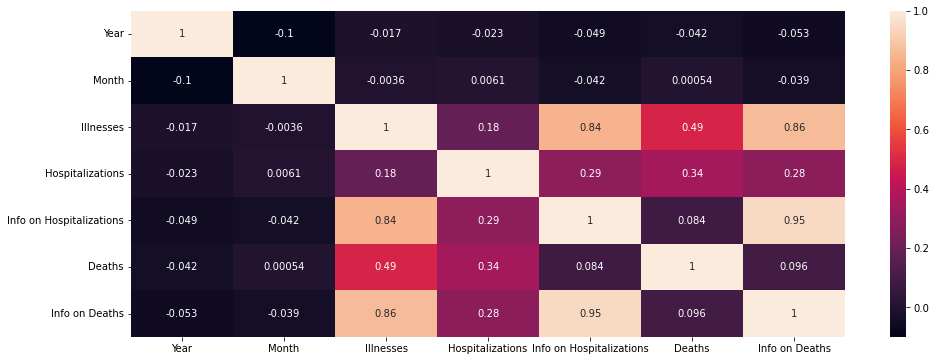

In [84]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),annot=True)

#### The heat map showed that deaths and illnesses had a moderate pushing strong positive correlation which is pretty interesting because it makes sense. The map also showed that the information on deaths and the information on hospitalizations were very strongly positively correlated which makes me question why. I wondered why Deaths and information available on deaths weren't more correlated and realized that HIPPA regulates patient information so there may not be more information available to the CDC however the person was still reported dead, which could also be the reason that hospitalizations and info on hospitializations aren't as correlated. 

## At this point I wanted to group my data in a way that would be easier for me to understand so I created a dataset that seperated the total counts of Illnesses per state to better understand which states had the most Illnesses from 2009 - 2020

### Here I grouped the states with their respective illness counts 

In [85]:
state = df.groupby('State')['Illnesses'].count()
state.head(70)

State
Alabama                                          558
Alaska                                           217
Arizona                                         1035
Arkansas                                         164
California                                      2844
Colorado                                        1212
Commonwealth of the Northern Mariana Islands       1
Connecticut                                      879
Delaware                                         134
Florida                                         2962
Georgia                                          623
Guam                                              27
Hawaii                                           583
Idaho                                            220
Illinois                                        3007
Indiana                                          588
Iowa                                             804
Kansas                                           728
Kentucky                                

### Next I went ahead and ranked the counts from greatest to least by state and found that in the 11 years Wisconsin had the highest count of Foodborne Illnesses which is something I wasn't expecting.

In [86]:
#Sort the data to find the top 5 states who have the most reports of Illness
state_ranked = df.groupby(['State'])['Illnesses'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
print(state_ranked)

                                           State  Count
56                                     Wisconsin   3395
37                                          Ohio   3327
34                                      New York   3184
14                                      Illinois   3007
9                                        Florida   2962
4                                     California   2844
23                                      Michigan   2839
40                                  Pennsylvania   2786
24                                     Minnesota   2680
52                                      Virginia   2333
39                                        Oregon   2332
22                                 Massachusetts   2115
48                                         Texas   1425
53                                    Washington   1218
5                                       Colorado   1212
35                                North Carolina   1139
2                                        Arizona

### I went ahead and broke down the data to just the top 5 states

In [87]:
state_ranked.head()

,State,Count
56,Wisconsin,3395
37,Ohio,3327
34,New York,3184
14,Illinois,3007
9,Florida,2962


### I then proceeded to do a bar graph to visualize the counts

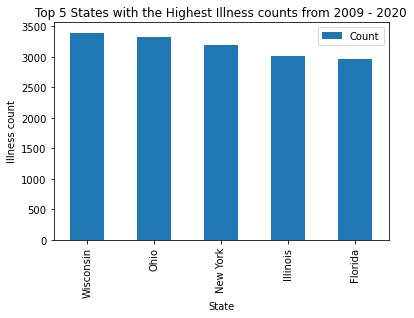

In [88]:
states_top5 = state_ranked.head().plot.bar(title="Top 5 States with the Highest Illness counts from 2009 - 2020", x='State', y='Count', ylabel='Illness count')

### I then wanted to pull out the most recent year in the data to compare it to the overall data. I pulled out every entry in 2020 and began analysis.

### I sorted out the entries from 2020 and put them into a dataset called year2020

In [89]:
year2020 = df[df["Year"] == 2020]
print(year2020)

       Year  Month        State                 Primary Mode  \
53558  2020      1  Mississippi             Person-to-person   
53584  2020      1    Wisconsin             Person-to-person   
53591  2020      1     Nebraska             Person-to-person   
53592  2020      1     New York                         Food   
53593  2020      1   New Mexico             Person-to-person   
...     ...    ...          ...                          ...   
57644  2020      3    Wisconsin             Person-to-person   
57645  2020     12   Multistate               Animal Contact   
57646  2020     12   Multistate               Animal Contact   
57647  2020     12  Mississippi  Indeterminate/Other/Unknown   
57648  2020     12        Idaho               Animal Contact   

                      Etiology Etiology Status  \
53558                      NaN             NaN   
53584   Norovirus Genogroup II       Confirmed   
53591   Norovirus Genogroup II       Confirmed   
53592  Clostridium perfringens 

### I then grouped the entries by state and Illness count 

In [90]:
year = year2020.groupby('State')['Illnesses'].count()
year.head(70)

State
Alabama            21
Alaska              1
Arizona            11
California         16
Colorado           29
Connecticut        35
Florida            37
Georgia             7
Hawaii              8
Idaho              21
Illinois          126
Indiana            27
Iowa               26
Kansas              3
Kentucky           30
Louisiana           6
Maine              26
Maryland            5
Massachusetts      94
Michigan           71
Minnesota         134
Mississippi         3
Missouri            7
Montana             2
Multistate         65
Nebraska           23
Nevada              9
New Hampshire      18
New Mexico         11
New York            7
North Carolina     48
North Dakota        8
Ohio               77
Oregon             44
Pennsylvania       53
Puerto Rico        20
Rhode Island       60
South Carolina     24
Tennessee          17
Texas              71
Utah               17
Vermont             4
Virginia           16
Washington         20
Wisconsin         156
Wyom

### I ranked the data from greatest to least number of illness counts

In [91]:
#Sort the data to find the top 5 states with the most reports of illness in 2020
year_ranked = year2020.groupby(['State'])['Illnesses'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
print(year_ranked)

             State  Count
44       Wisconsin    156
20       Minnesota    134
10        Illinois    126
18   Massachusetts     94
32            Ohio     77
19        Michigan     71
39           Texas     71
24      Multistate     65
36    Rhode Island     60
34    Pennsylvania     53
30  North Carolina     48
33          Oregon     44
6          Florida     37
5      Connecticut     35
14        Kentucky     30
4         Colorado     29
11         Indiana     27
12            Iowa     26
16           Maine     26
37  South Carolina     24
25        Nebraska     23
0          Alabama     21
9            Idaho     21
43      Washington     20
35     Puerto Rico     20
27   New Hampshire     18
40            Utah     17
38       Tennessee     17
3       California     16
42        Virginia     16
2          Arizona     11
28      New Mexico     11
26          Nevada      9
8           Hawaii      8
31    North Dakota      8
7          Georgia      7
29        New York      7
22        Mi

### I printed out the top 5 states in a way that's much more visualy pleasing

In [92]:
year_ranked.head()

,State,Count
44,Wisconsin,156
20,Minnesota,134
10,Illinois,126
18,Massachusetts,94
32,Ohio,77


### I created another bar graph to visualize the data from 2020

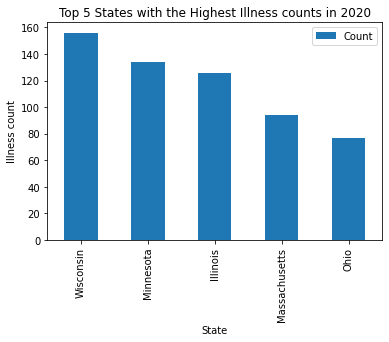

In [93]:
year_top5 = year_ranked.head().plot.bar(title="Top 5 States with the Highest Illness counts in 2020", x='State', y='Count', ylabel='Illness count')

### I was able to find that Wisconsin was number 1 on both graphs which is definetly a pretty interesting insight. In fact, I noticed that 3 of the same states are in the top 5 for 2020, Wisconsin, Ohio, and Illinois.

## Next, I wanted to predict the number of Illnesses using a multi-feature linear regression

#### In order to start the linear regression I need to drop rows that contain missing values (NaN) because the linear regression won't accept NaN values 

In [94]:
newdf = df.dropna(how='any')
print(newdf)
len(newdf)

       Year  Month       State      Primary Mode                 Etiology  \
0      2009      1   Minnesota  Person-to-person   Norovirus Genogroup II   
1      2009      1   Minnesota              Food                Norovirus   
2      2009      2   Minnesota  Person-to-person                Norovirus   
3      2009      1   Minnesota  Person-to-person        Norovirus unknown   
5      2009      1   Minnesota              Food                Norovirus   
...     ...    ...         ...               ...                      ...   
57582  2020      8  California              Food      Salmonella enterica   
57583  2020     10  Multistate              Food      Salmonella enterica   
57619  2019      7   Louisiana              Food  Cyclospora cayetanensis   
57620  2019     12       Texas              Food    Clostridium botulinum   
57644  2020      3   Wisconsin  Person-to-person        Norovirus unknown   

      Etiology Status                                            Setting  \

26909

In [95]:
#this is my condensed data frame I uploaded to the repository 

newdf.to_csv('final_outbreak_data.csv')

### After removing columns with NaN values we are left with 26,909 complete entries which is significant enough to train a predictive model

In [96]:
x = newdf[['Deaths','Info on Deaths','Hospitalizations','Info on Hospitalizations']]
y = newdf['Illnesses']

In [97]:
from sklearn.metrics import accuracy_score

def train_linear_regression(x, y):
    
    #Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)
    
    # Split the data into training/testing sets
    x_train = x[:-TEST_SIZE]
    x_test = x[-TEST_SIZE:]

    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    

In [98]:
train_linear_regression(x, y)

Coefficients: 
 [0.0673254  0.8963811  0.10526228 0.07742061]
Mean squared error: 231.92
Coefficient of determination: 0.82


## Next I want to see in what ways I can expand the linear regression, so a quick search showed me that if I encode my categorical variables that I can incoorporate them into the linear regression as additional features which could increase the reliability/accuracy of the model

###  To do this I started by getting a basic idea of all the sub categories and counts for each categorical variable in the dataset

In [99]:
newdf['Primary Mode'].value_counts()

Person-to-person                                     16916
Food                                                  6686
Indeterminate/Other/Unknown                           2211
Water                                                 1006
Environmental contamination other than food/water       70
Animal Contact                                          20
Name: Primary Mode, dtype: int64

In [100]:
newdf['Setting'].value_counts()

Long-term care/nursing home/assisted living facility                                                          12372
Restaurant - Sit-down dining                                                                                   2733
School/college/university                                                                                      1989
Child day care                                                                                                 1633
Private home/residence                                                                                         1513
                                                                                                              ...  
Private home/residence; Grocery store; School/college/university; Other; Unknown                                  1
Restaurant - Sit-down dining; Grocery store; Other                                                                1
Private home/residence; Other; Unknown                                  

In [101]:
newdf['Etiology Status'].value_counts()

Confirmed                                                                                                                                        13686
Suspected                                                                                                                                        11894
Confirmed; Confirmed                                                                                                                               441
Confirmed; Suspected                                                                                                                               315
Suspected; Suspected                                                                                                                               303
Suspected; Confirmed                                                                                                                                85
Suspected; Suspected; Suspected                                                               

In [102]:
newdf['Etiology'].value_counts()

Norovirus Genogroup II                                                   6750
Norovirus                                                                5758
Norovirus unknown                                                        5007
Salmonella enterica                                                      1706
Norovirus Genogroup I                                                    1181
                                                                         ... 
Salmonella enterica; Cryptosporidium unknown; Clostridium perfringens       1
Campylobacter unknown; Campylobacter unknown                                1
Cryptosporidium unknown; Norovirus Genogroup II                             1
Cryptosporidium hominis; Cryptosporidium other                              1
Bacillus cereus; Norovirus                                                  1
Name: Etiology, Length: 491, dtype: int64

### After I got value counts I noticed that the transmission setting and primary mode of transmission could potentially be interesting to examine because there could be some interesting correlation between the two and I proceeded to create a two way table to examine the relationship closer before I encode the categorical variables 

In [103]:
# Made a two way table of setting and primary mode for visualization purposes
mode_setting = pd.crosstab(index = newdf['Primary Mode'], 
                           columns = newdf['Setting'])

mode_setting

Setting,Apartment/Condo,Assisted Living/Rehab,Banquet Facility (food prepared and served on-site),Banquet Facility (food prepared and served on-site); Camp; Hotel/motel,Banquet Facility (food prepared and served on-site); Caterer (food prepared off-site from where served),"Banquet Facility (food prepared and served on-site); Caterer (food prepared off-site from where served); Fair, festival, other temp or mobile services",Banquet Facility (food prepared and served on-site); Caterer (food prepared off-site from where served); Religious facility,Banquet Facility (food prepared and served on-site); Other,Banquet Facility (food prepared and served on-site); Religious facility,Banquet Facility (food prepared and served on-site); Restaurant - Buffet,...,School/College/University,School/college/university,School/college/university; Camp,School/college/university; Other,School/college/university; Prison/jail,Shelter/group home/transitional housing,Ship/boat,Subdivision/Neighborhood,Trailer Park,Unknown
Primary Mode,,,,,,,,,,,,,,,,,,,,,
Animal Contact,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Environmental contamination other than food/water,0,0,0,0,0,0,0,0,0,0,...,0,12,0,0,0,0,0,0,0,0
Food,0,0,233,1,12,1,1,3,1,1,...,0,76,1,1,1,0,1,0,0,227
Indeterminate/Other/Unknown,0,0,0,0,0,0,0,0,0,0,...,0,201,0,0,0,2,3,0,0,61
Person-to-person,0,0,0,0,0,0,0,0,0,0,...,0,1700,0,0,0,32,4,0,0,19
Water,38,21,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,0,6,4,31


#### It's interesting to see that the data makes sense, for example at schools and universities person-to-person contact is the most common way to catch an illness

### I decided to only encode the Primary Mode column for the purposes of this exploration because the other columns had several values that were seperated with semicolons and I felt that would take away from the accuracy of the model

In [104]:
newdf['Primary Mode'].replace(['Person-to-person', 'Food', 'Indeterminate/Other/Unknown', 'Water', 
                               'Environmental contamination other than food/water', 'Animal Contact'
                              ],
                        [0, 1, 2, 3, 4, 5], inplace=True)

newdf['Primary Mode']

C:\Users\aphel\AppData\Local\Temp\ipykernel_29636\668872232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Primary Mode'].replace(['Person-to-person', 'Food', 'Indeterminate/Other/Unknown', 'Water',


0        0
1        1
2        0
3        0
5        1
        ..
57582    1
57583    1
57619    1
57620    1
57644    0
Name: Primary Mode, Length: 26909, dtype: int64

In [105]:
#printing the dataset to ensure that every category encoded properly
newdf['Primary Mode']

0        0
1        1
2        0
3        0
5        1
        ..
57582    1
57583    1
57619    1
57620    1
57644    0
Name: Primary Mode, Length: 26909, dtype: int64

### Next I added the primary mode variable to the list of values in x and called the function to run and overall there was no substantial change, I feel like the data is just not complete enough to accurately predict because there is so much data that is missing or imputted in an awkward way

In [106]:
x = newdf[['Hospitalizations','Info on Deaths','Deaths','Info on Hospitalizations', 'Primary Mode']]
y = newdf['Illnesses']

train_linear_regression(x, y)

Coefficients: 
 [ 0.13795709  0.89385898  0.04400665  0.07669703 -0.91047193]
Mean squared error: 231.52
Coefficient of determination: 0.82


### The linear regression had an R^2 value that was close to 1 however the MSE was so far off and indicated a high variance between the observed and predicted data which showed that this model is not very reliable 

## Using a different approach I wanted to try and predict the Primary mode of transmission and to do that I conducted a logistical regression since I am trying to predict a categorical variable using quantitative data

In [107]:
x = newdf[['Hospitalizations','Info on Deaths','Deaths','Info on Hospitalizations', 'Illnesses']]
y = newdf['Primary Mode']

from sklearn.metrics import accuracy_score

def train_logistic_regression(x, y):
    
    #Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)

    # Split the data into training/testing sets
    x_train = x[:-TEST_SIZE]
    x_test = x[-TEST_SIZE:]

    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]

    # Create logistic regression object
    regr = linear_model.LogisticRegression(solver='liblinear')

    # Train the model using the training sets
    regr.fit(x_train, y_train)
    
    # Look at training error
    y_pred_train = regr.predict(x_train)
    print(accuracy_score(y_train, y_pred_train))

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    # Get test error
    print(accuracy_score(y_test, y_pred))
    
    print(regr.coef_)
    
    return regr

In [108]:
train_logistic_regression(x, y)

0.6414131404221584
0.6244982904712353
[[-0.18850368  0.00481661  0.27014207  0.00587328  0.0164726 ]
 [ 0.14608218 -0.00086223 -0.58076906  0.00104058 -0.02265243]
 [-0.00085468 -0.00710864 -0.09866049 -0.00512376 -0.00514013]
 [ 0.11617225 -0.00367728  0.33862045 -0.02535944 -0.00315164]
 [-0.01387596 -0.00971246 -0.13103868  0.00581273  0.00197772]
 [ 0.116706    0.06005217 -0.40336423  0.02273761 -0.36145582]]


LogisticRegression(solver='liblinear')

### The model I ended with had an 62% accuracy rate of being able to predict the Primary Mode of transmission using several variables from the dataset. 